In [9]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sb  
from scipy.io import loadmat  
%matplotlib inline
from sklearn import svm  


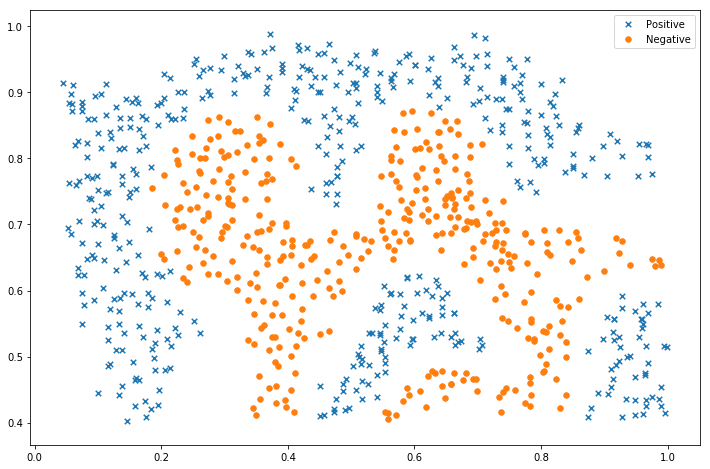

In [10]:
raw_data = loadmat('data2.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])  
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]  
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')  
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')  
ax.legend()  

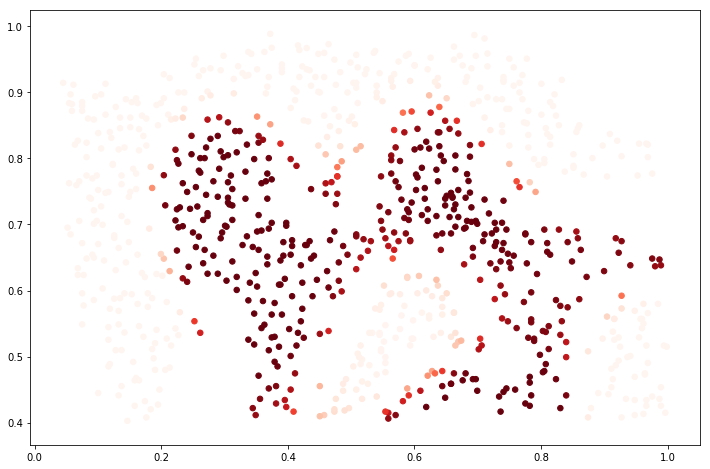

In [11]:
svc = svm.SVC(C=100, gamma=10, probability=True)  
svc.fit(data[['X1', 'X2']], data['y'])  
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')  

In [12]:
svc.score(data[['X1', 'X2']], data['y'])  

0.9698725376593279